In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [95]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [96]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [97]:
ages = values.loc[:, ["building_id", "age"]]
ages_damage = ages.merge(labels, left_on = "building_id", right_on = "building_id")
ages_damage = ages_damage.loc[:, ["age", "damage_grade"]]
ages_damage

,age,damage_grade
0,30,3
1,10,2
2,10,3
3,10,2
4,30,3
...,...,...
260596,55,2
260597,0,3
260598,55,3
260599,10,2


<AxesSubplot:title={'center':'Relacion entre la longevidad de la estructura y el nivel de destruccion.'}, xlabel='Edad de la construccion', ylabel='Promedio de nivel de destruccion'>

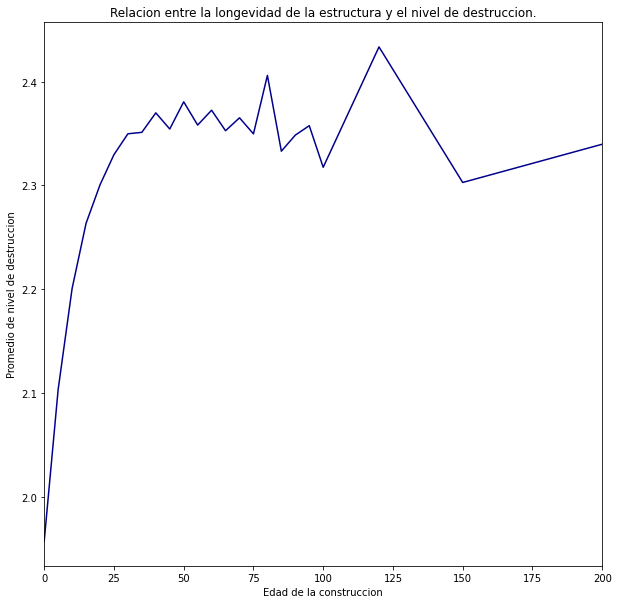

In [98]:
ages_damage['avg_damage_grade_for_age'] = ages_damage.groupby('age')['damage_grade'].transform('mean')
ages_damage['more_than_100_buildings'] = ages_damage.groupby('age')['damage_grade'].transform('count') > 100
ages_damage = ages_damage[ages_damage["more_than_100_buildings"]]
avg_dmg_per_age = ages_damage.loc[:, ["age", "avg_damage_grade_for_age"]].groupby('age').agg({"avg_damage_grade_for_age": "max"})
avg_dmg_per_age["avg_damage_grade_for_age"].plot(figsize = (10,10),\
                                                title = "Relacion entre la longevidad de la estructura y el nivel de destruccion.",\
                                                xlim = (0, 200),\
                                                color = "darkblue",\
                                                xlabel = "Edad de la construccion",\
                                                ylabel = "Promedio de nivel de destruccion")

In [99]:
ages = values[["building_id", "height_percentage"]]
height_damage = ages.merge(labels, left_on = "building_id", right_on = "building_id")
height_damage = height_damage[["height_percentage", "damage_grade"]]
height_damage

,height_percentage,damage_grade
0,5,3
1,7,2
2,5,3
3,5,2
4,9,3
...,...,...
260596,3,2
260597,5,3
260598,7,3
260599,6,2


<AxesSubplot:title={'center':'Relacion entre la altura (normalizada) de la estructura y el nivel de destruccion.'}, xlabel='Altura normalizada de la construccion', ylabel='Promedio de nivel de destruccion'>

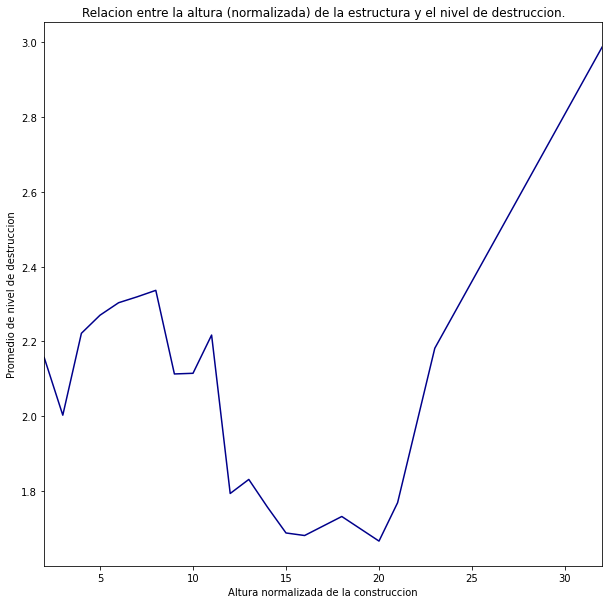

In [100]:
height_damage['avg_damage_grade_for_height'] = height_damage.groupby('height_percentage')['damage_grade'].transform('mean')
height_damage['more_than_10_buildings'] = height_damage.groupby('height_percentage')['damage_grade'].transform('count') > 10
height_damage = height_damage[height_damage["more_than_10_buildings"]]
avg_dmg_per_height = height_damage[["height_percentage", "avg_damage_grade_for_height"]].groupby('height_percentage').agg({"avg_damage_grade_for_height": "max"})
avg_dmg_per_height["avg_damage_grade_for_height"].plot(figsize = (10,10),\
                                                title = "Relacion entre la altura (normalizada) de la estructura y el nivel de destruccion.",\
                                                xlim = (2, 32),\
                                                color = "darkblue",\
                                                xlabel = "Altura normalizada de la construccion",\
                                                ylabel = "Promedio de nivel de destruccion")

In [101]:
height_floor_damage = labels.merge(values[["building_id", "count_floors_pre_eq", "height_percentage"]], left_on = "building_id", right_on= "building_id")
height_floor_damage["avg_height_per_floor"] = height_floor_damage["height_percentage"]/height_floor_damage["count_floors_pre_eq"]
height_floor_damage["avg_height_per_floor"] = height_floor_damage["avg_height_per_floor"].apply(np.ceil)
height_floor_damage = height_floor_damage[["damage_grade", "avg_height_per_floor"]]
height_floor_damage

,damage_grade,avg_height_per_floor
0,3,3.0
1,2,4.0
2,3,3.0
3,2,3.0
4,3,3.0
...,...,...
260596,2,3.0
260597,3,3.0
260598,3,3.0
260599,2,3.0


<AxesSubplot:title={'center':'Relacion entre la altura promedio por piso de la estructura y el nivel de destruccion.'}, xlabel='Altura normalizada/cantidad de pisos', ylabel='Promedio de nivel de destruccion'>

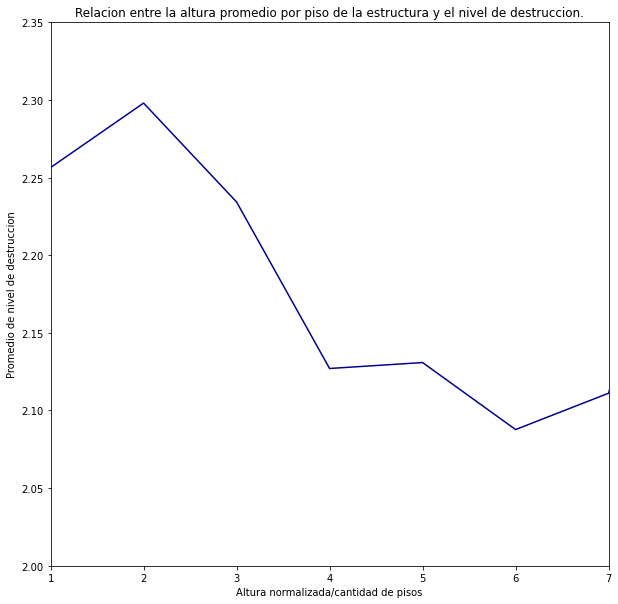

In [102]:
height_floor_damage['avg_damage_grade_for_height_per_floor'] = height_floor_damage.groupby('avg_height_per_floor')['damage_grade'].transform('mean')
height_floor_damage['more_than_10_buildings'] = height_floor_damage.groupby('avg_damage_grade_for_height_per_floor')['damage_grade'].transform('count') > 50
height_floor_damage = height_floor_damage[height_floor_damage["more_than_10_buildings"]]
avg_dmg_per_height_per_floor = height_floor_damage[["avg_height_per_floor", "avg_damage_grade_for_height_per_floor"]].groupby('avg_height_per_floor').agg({"avg_damage_grade_for_height_per_floor": "max"})
avg_dmg_per_height_per_floor["avg_damage_grade_for_height_per_floor"].plot(figsize = (10,10),\
                                                title = "Relacion entre la altura promedio por piso de la estructura y el nivel de destruccion.",\
                                                xlim = (1, 7),\
                                                ylim = (2.0, 2.35),\
                                                color = "darkblue",\
                                                xlabel = "Altura normalizada/cantidad de pisos",\
                                                ylabel = "Promedio de nivel de destruccion")